# Task 2 Credit Risk Prediction

## Introduction
Credit risk prediction using logistic regression on a loan dataset.

In [1]:
# Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load and inspect the dataset

In [4]:
# Example loading code
df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Basic info and nulls
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())


Shape: (614, 13)

Missing values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [6]:
# Example: fill missing LoanAmount with median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Fill other categorical missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Drop rows with any remaining missing values
df.dropna(inplace=True)


/tmp/ipython-input-6-2559333011.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
/tmp/ipython-input-6-2559333011.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [7]:
print("\nMissing values:\n", df.isnull().sum())



Missing values:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


## Data Visualization / EDA

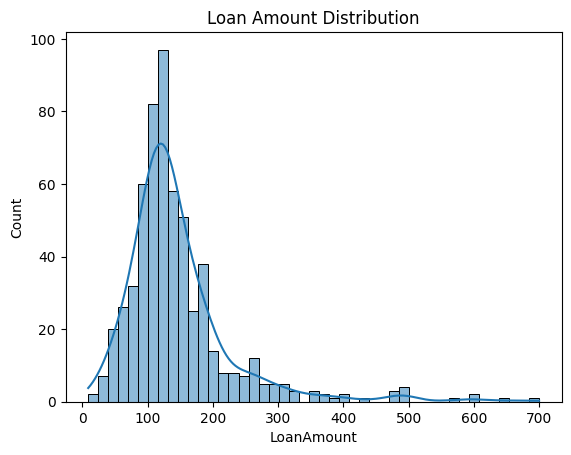

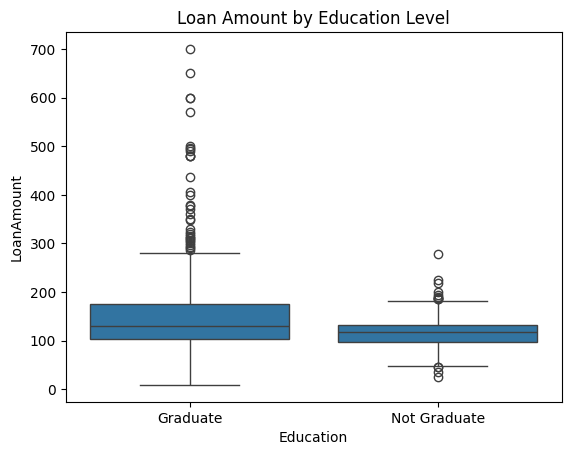

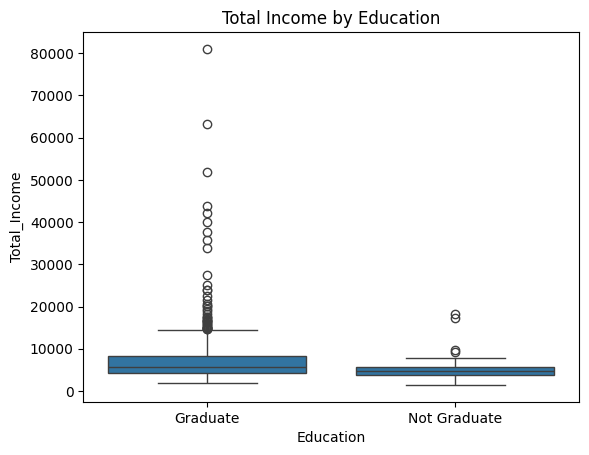

In [8]:
# Loan amount distribution
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Loan Amount Distribution')
plt.show()

# Box plot of loan amount vs education
sns.boxplot(x='Education', y='LoanAmount', data=df)
plt.title('Loan Amount by Education Level')
plt.show()

# Income comparison by education
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
sns.boxplot(x='Education', y='Total_Income', data=df)
plt.title('Total Income by Education')
plt.show()


## Model Training & Evaluation

In [10]:
# For modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [11]:
# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df_encoded.drop('Loan_Status_Y', axis=1)  # assuming 'Loan_Status' was one-hot encoded
y = df_encoded['Loan_Status_Y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8305084745762712

Confusion Matrix:
 [[14 19]
 [ 1 84]]

Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.42      0.58        33
        True       0.82      0.99      0.89        85

    accuracy                           0.83       118
   macro avg       0.87      0.71      0.74       118
weighted avg       0.85      0.83      0.81       118



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Conclusion
In this task, we built a classification model to predict whether a loan applicant is likely to default:

Data cleaning involved handling missing values using median and mode imputation.

EDA revealed insights into how education and income relate to loan amounts.

We used Logistic Regression, achieving decent prediction accuracy and understanding which factors influence loan approval.

This model could help financial institutions make smarter decisions by identifying high-risk applicants based on historical data.